<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [42]:
# initializes lists to be appended to
state = []
rate = []
verbal = []
math = []
sat = []

with open('../Project 2/sat_scores.csv') as f:
    reader = csv.reader(f)
    
    for row in reader:
        sat.append(row) 
f.close

# append each value in sat into the corresponding list
for i in range(1, len(sat)):
    state.append(sat[i][0])
    rate.append(sat[i][1])
    verbal.append(sat[i][2])
    math.append(sat[i][3])

# initialize dictionary
sat_dict = {}

sat_dict['State'] = state
sat_dict['Rate'] = rate
sat_dict['Verbal'] = verbal
sat_dict['Math'] = math

print sat_dict


{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df = pd.DataFrame(sat_dict)
print type(df)

sat_scores_raw = pd.read_csv('../Project 2/sat_scores.csv')

# remove the 'All' row in csv file as it is not a state
sat_scores = sat_scores_raw.drop(sat_scores_raw.index[-1])
print sat_scores

<class 'pandas.core.frame.DataFrame'>
   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32   

Different data types: making a pandas Dataframe with dictionary makes it a dataframe, while using .read_csv() makes it an object.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

Data describes SAT scores broken down into Verbal and Math 

In [4]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
from pprint import pprint
data_dict = {}

state = {'Variable': sat_scores['State'].name, 'Type': sat_scores['State'].dtype, 'Description': 'Two-letter abbreviation of American state', 'Shape': sat_scores['State'].shape}
rate = {'Variable': sat_scores['Rate'].name, 'Type': sat_scores['Rate'].dtype, 'Description': 'Participation Rate', 'Shape': sat_scores['Rate'].shape}
verbal = {'Variable': sat_scores['Verbal'].name, 'Type': sat_scores['Verbal'].dtype, 'Description': 'SAT Verbal Component Score', 'Shape': sat_scores['Verbal'].shape}
math = {'Variable': sat_scores['Math'].name, 'Type': sat_scores['Math'].dtype, 'Description': 'SAT Math Component Score', 'Shape': sat_scores['Math'].shape}
data_dict['State'] = state
data_dict['Rate'] = rate
data_dict['Verbal'] = verbal
data_dict['Math'] = math

pprint(data_dict)


{'Math': {'Description': 'SAT Math Component Score',
          'Shape': (51,),
          'Type': dtype('int64'),
          'Variable': 'Math'},
 'Rate': {'Description': 'Participation Rate',
          'Shape': (51,),
          'Type': dtype('int64'),
          'Variable': 'Rate'},
 'State': {'Description': 'Two-letter abbreviation of American state',
           'Shape': (51,),
           'Type': dtype('O'),
           'Variable': 'State'},
 'Verbal': {'Description': 'SAT Verbal Component Score',
            'Shape': (51,),
            'Type': dtype('int64'),
            'Variable': 'Verbal'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

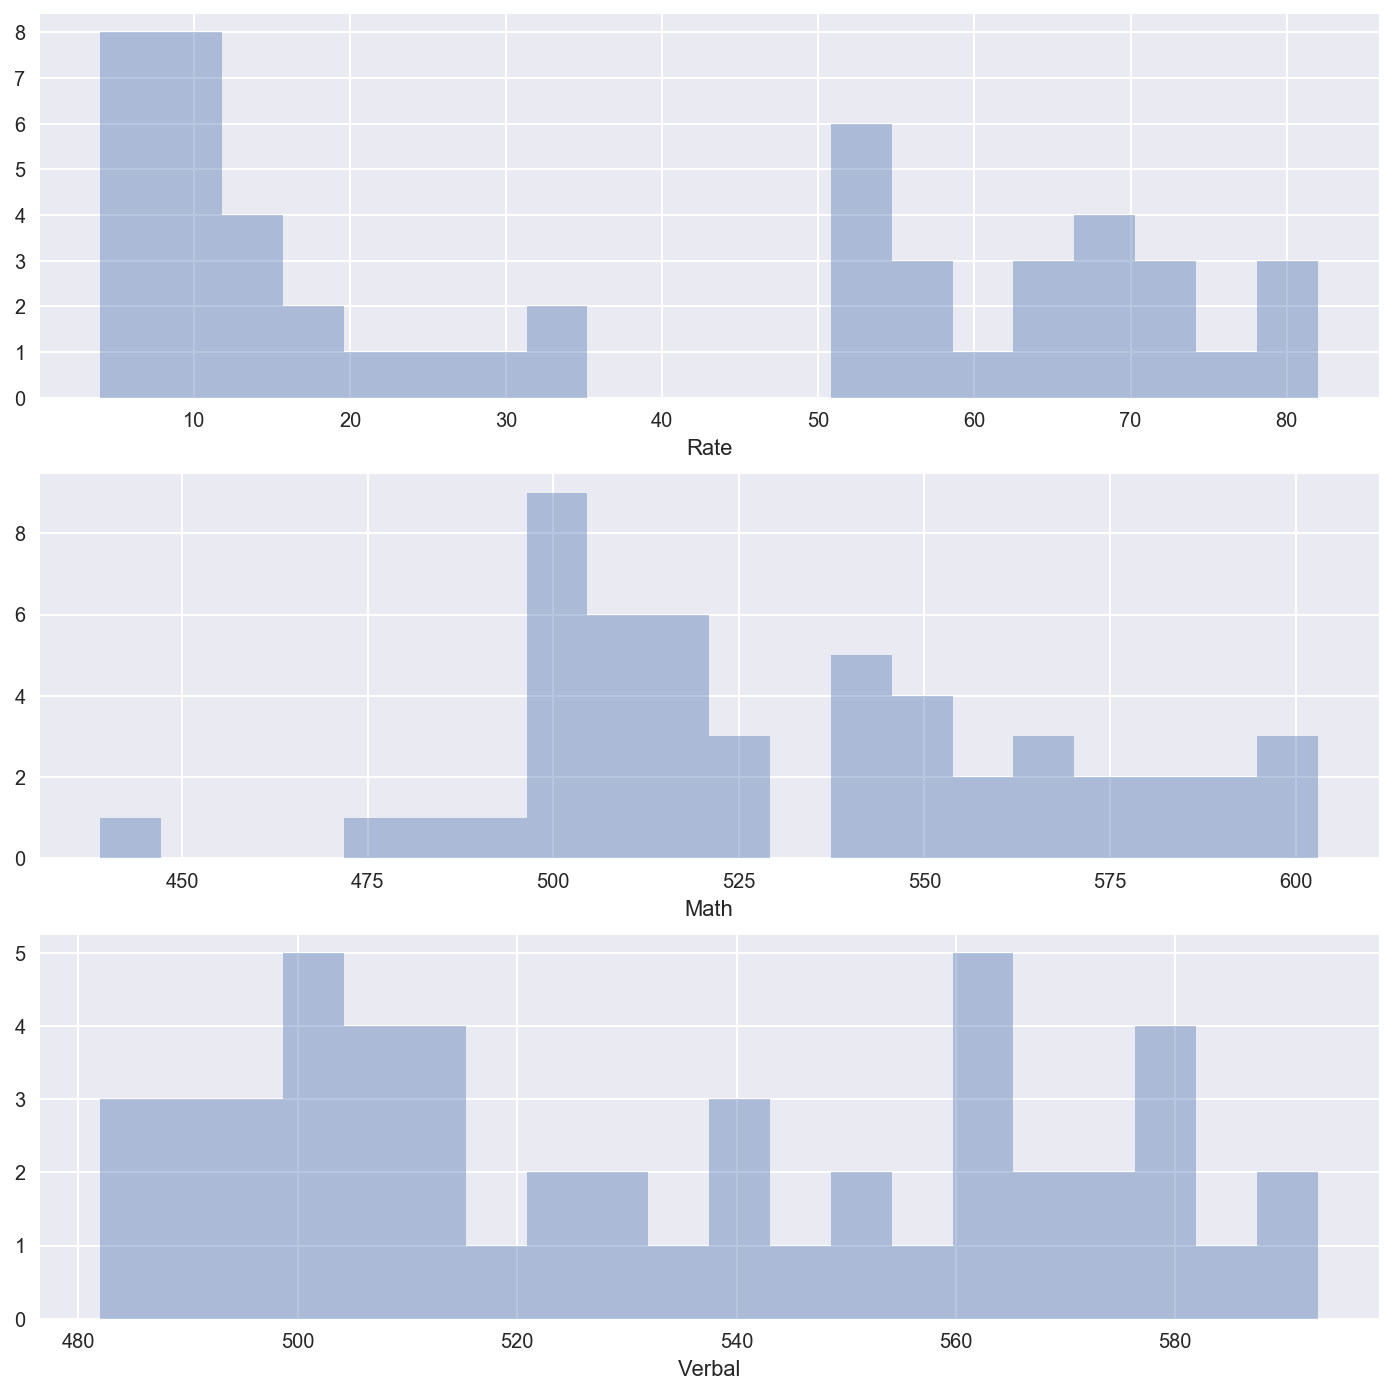

In [6]:
import seaborn as sns
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)   # creates three subplots of 3 rows, 1 column
sns.distplot(sat_scores['Rate'], bins=20, kde=False)
plt.subplot(3,1,2)
sns.distplot(sat_scores['Math'], bins=20, kde=False)
plt.subplot(3,1,3)
sns.distplot(sat_scores['Verbal'], bins=20, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

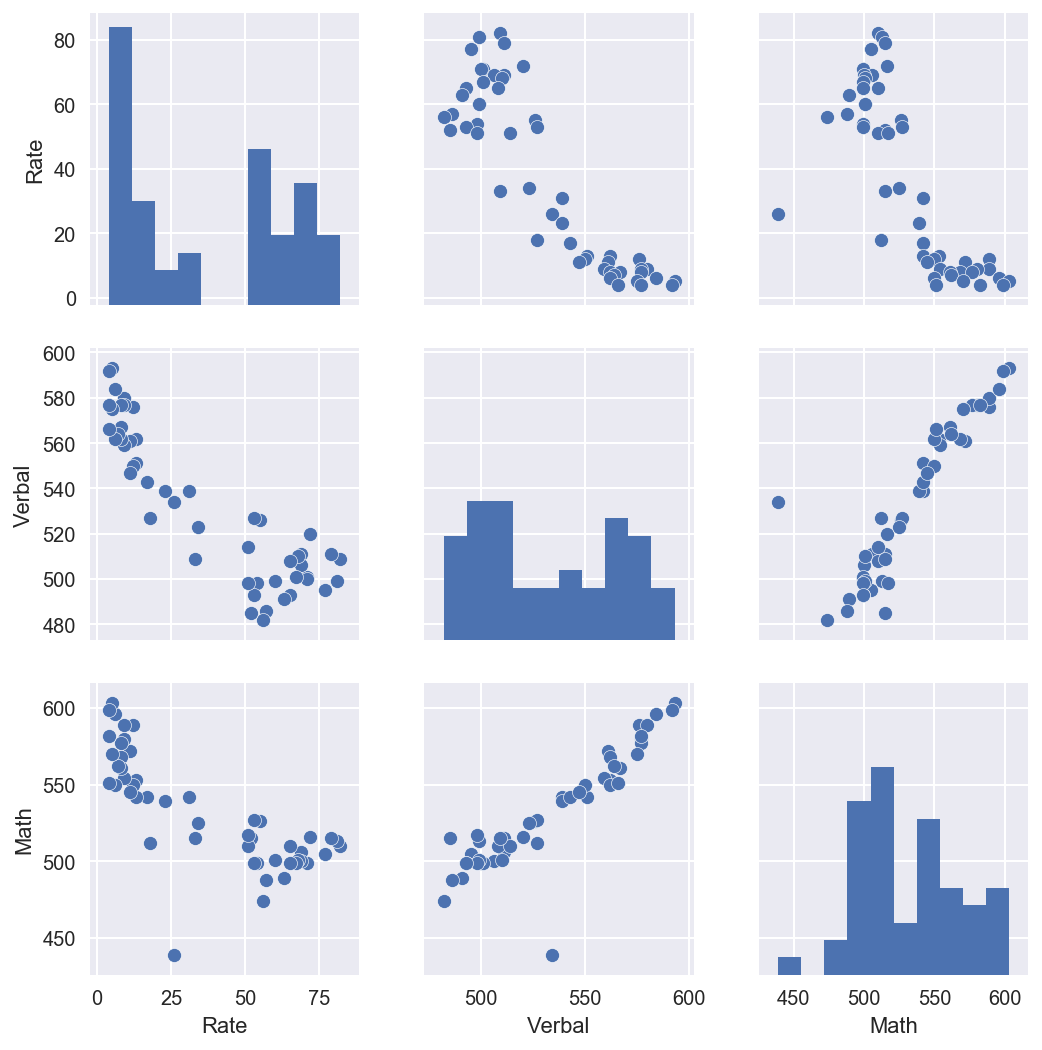

In [7]:
sns.pairplot(sat_scores)

OH (Ohio) stands out: it scored 439 for Math, the lowest score among all the states, but still had decent Verbal scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

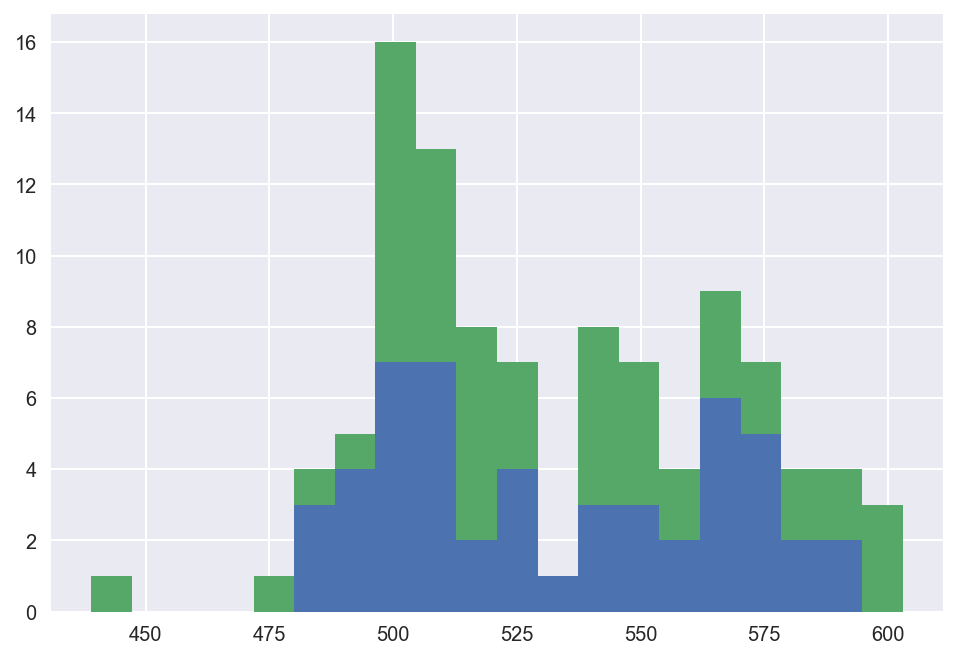

In [8]:
import matplotlib.pyplot as plt
stacked = plt.hist([sat_scores['Verbal'], sat_scores['Math']], stacked=True, bins=20)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

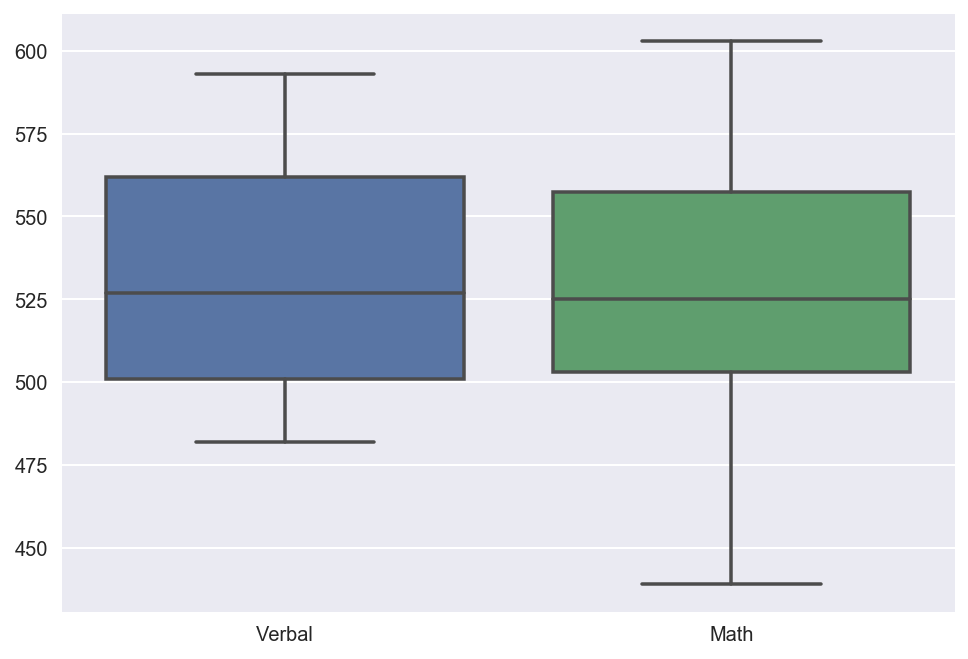

In [9]:
# slices sat_scores dataframe to include only verbal and math columns
verb_math = sat_scores.loc[:,'Verbal':'Math']
sns.boxplot(data=verb_math)

A boxplot can show precise values of min, max, median, 25th and 75th percentiles a glance, giving a high-level summary of the distribution of values for the statistic in question. This is something that histograms and scatterplots cannot show. 

Another plus point is that boxplots can be used to show distributions across many different groups of datapoints.

Histograms are less ideal than boxplots when the number of datapoints is low. Scatterplots are not applicable when there are more than two variables to be shown.

Plotting rates on the same graph as verbal and math is not appropriate due to different scales. Range for rate is from 0 - 100% while the range for verbal and math scores are 0 - 800.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [10]:
sat_standard = sat_scores.loc[:,['Rate', 'Verbal', 'Math']]

In [11]:
# Standardizes information for rate, verbal and math columns so that they are centered around 0 with a standard deviation of 1
sat_standard1 = sat_standard.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

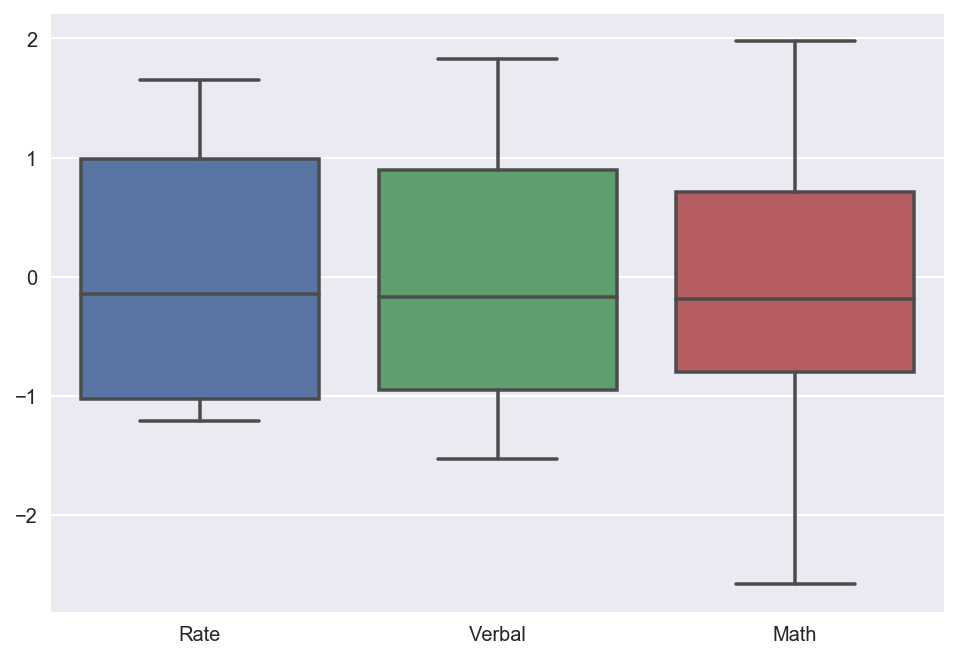

In [12]:
sns.boxplot(data=sat_standard1)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [13]:
verbal_mean = np.mean(sat_scores['Verbal'])
subset_list1 = sat_scores.loc[lambda sat_score: sat_score.Verbal > np.mean(sat_scores['Verbal']), 'State']

print subset_list1
print (str(len(subset_list1)) + ' states are above the mean')

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
24 states are above the mean


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [14]:
verbal_median = np.median(sat_scores['Verbal'])
subset_list2 = sat_scores.loc[lambda sat_score: sat_score.Verbal >= np.median(sat_scores['Verbal']), 'State']
print subset_list2
print (str(len(subset_list2)) + ' states are above the median')

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26 states are above the median


WA and WV are added to the list since their Math scores are at least equivalent to the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [15]:
diff1 = sat_scores['Verbal'] - sat_scores['Math']
sat_scores['Verbal-Math'] = diff1
print sat_scores

   State  Rate  Verbal  Math  Verbal-Math
0     CT    82     509   510           -1
1     NJ    81     499   513          -14
2     MA    79     511   515           -4
3     NY    77     495   505          -10
4     NH    72     520   516            4
5     RI    71     501   499            2
6     PA    71     500   499            1
7     VT    69     511   506            5
8     ME    69     506   500            6
9     VA    68     510   501            9
10    DE    67     501   499            2
11    MD    65     508   510           -2
12    NC    65     493   499           -6
13    GA    63     491   489            2
14    IN    60     499   501           -2
15    SC    57     486   488           -2
16    DC    56     482   474            8
17    OR    55     526   526            0
18    FL    54     498   499           -1
19    WA    53     527   527            0
20    TX    53     493   499           -6
21    HI    52     485   515          -30
22    AK    51     514   510      

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [16]:
# sort values by the 'verbal-math' column and takes the top 10 values into df1
df1 = sat_scores.loc[:,['State','Verbal-Math']].sort_values('Verbal-Math', ascending=False).nlargest(10, 'Verbal-Math')

# add Math-Verbal column to sat_scores
sat_scores['Math-Verbal'] = sat_scores['Math'] - sat_scores['Verbal']

# sort values by the 'math-verbal' column and takes the top 10 values into df2
df2 = sat_scores.loc[:,['State','Math-Verbal']].sort_values('Math-Verbal', ascending=False).nlargest(10, 'Math-Verbal')

print df1.head(3)
print df2.head(3)


   State  Verbal-Math
27    OH           95
50    MS           15
29    WV           15
   State  Math-Verbal
21    HI           30
23    CA           19
1     NJ           14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


Axes(0.125,0.125;0.62x0.755)


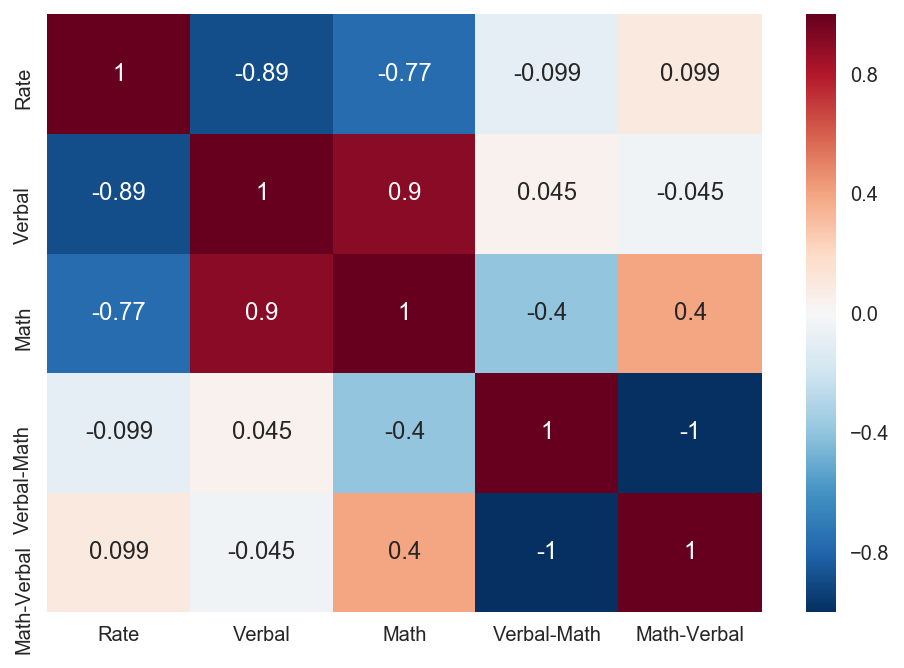

In [17]:
matrix = sat_scores.corr(method='pearson')
print sns.heatmap(matrix, annot=True)


The correlation matrix shows that high math scores is highly correlated with high verbal scores. In addition, there is a negative correlation between participation rate in the state and the SAT scores for both math and verbal components.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [18]:
# all the numbers have been integers so I need to float them for describe attribute to work
sat_scores['Rate'] = sat_scores['Rate'].apply(float)
sat_scores['Verbal'] = sat_scores['Verbal'].apply(float)
sat_scores['Math'] = sat_scores['Math'].apply(float)
sat_scores['Math-Verbal'] = sat_scores['Math-Verbal'].apply(float)

sat_scores.describe()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275,-0.686275
std,27.550681,33.360667,36.287393,15.839811,15.839811
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,503.000000,-6.000000,-4.500000
50%,33.000000,527.000000,525.000000,0.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [43]:
sat_scores.cov()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal,Percentile
Rate,759.040000,-816.280000,-773.220000,-43.060000,43.060000,781.411765
Verbal,-816.280000,1112.934118,1089.404706,23.529412,-23.529412,-850.823529
Math,-773.220000,1089.404706,1316.774902,-227.370196,227.370196,-831.568627
Verbal-Math,-43.060000,23.529412,-227.370196,250.899608,-250.899608,-19.254902
Math-Verbal,43.060000,-23.529412,227.370196,-250.899608,250.899608,19.254902
Percentile,781.411765,-850.823529,-831.568627,-19.254902,19.254902,848.827374


They are both measures of how two or more random variables move in tandem with one another. Normalization converts covariance to correlation. Unlike covariance, whose range can run infinitely, the range for correlation values run from -1 to 1, allowing one to interpret the results easily. Correlation measures are also not affected by change in scales and is dimensionless, i.e. it is a unit-free measure of the relationship between variables (compared to covariance, where the value is obtained by the product of the units of the two variables).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [20]:
drugs = pd.read_csv('../Project 2/drug-use-by-age.csv')
drugs.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


The dataset appears to contain usage rate and frequency of use of different types of drugs across people of different ages. There are some values that are left blank (but not zero), indicating missing data. 

In [21]:
drugs.shape

(17, 28)

From the shape attribute we can see that the dataset has 17 rows and 28 columns. The data is in the wide format, with columns representing variables and rows representing one observation.

In [22]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

From dtypes attribute we see that cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency and meth-frequency are all object type values, which will be a problem when we are trying to calculate any statistical numbers from the column. Therefore I would clean this up by converting the values of these columns into floats.

Herein one of the first problems with the dataset surfaces. Beyond the age of 21, the last few rows in the dataset represent age groups rather than a single age. 

In [23]:
ages = np.array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 29, 34, 49, 64, 65])
#drugs.drop('age', axis=1, inplace=True)
drugs['ages'] = ages
drugs.set_index('ages', inplace=True)
drugs.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
ages,,,,,,,,,,,,,,,,,,,,,
12,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [24]:
# cleans up drugs dataset to replace dashes with zero
drugs[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']] = drugs[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']].replace('-', 0.)

# function to change all datatypes into float
def col_float(column):
    drugs[column] = drugs[column].apply(float)
col_float('n')
col_float('cocaine-frequency')
col_float('crack-frequency')
col_float('heroin-frequency')
col_float('inhalant-frequency')
col_float('oxycontin-frequency')
col_float('meth-frequency')

drugs.dtypes


age                         object
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [25]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
1. Is there any correlation between two or more types of drug usage?
2. Does drug usage rise in tandem with alcohol use?
3. Are there any outliers and if so is it surprising?



In [26]:
# Splits drugs into two dataframes, one by use and the other by frequency

drugs_use = drugs[['alcohol-use', 'marijuana-use',
        'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]
                  
drugs_frequency = drugs[['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency','inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']]

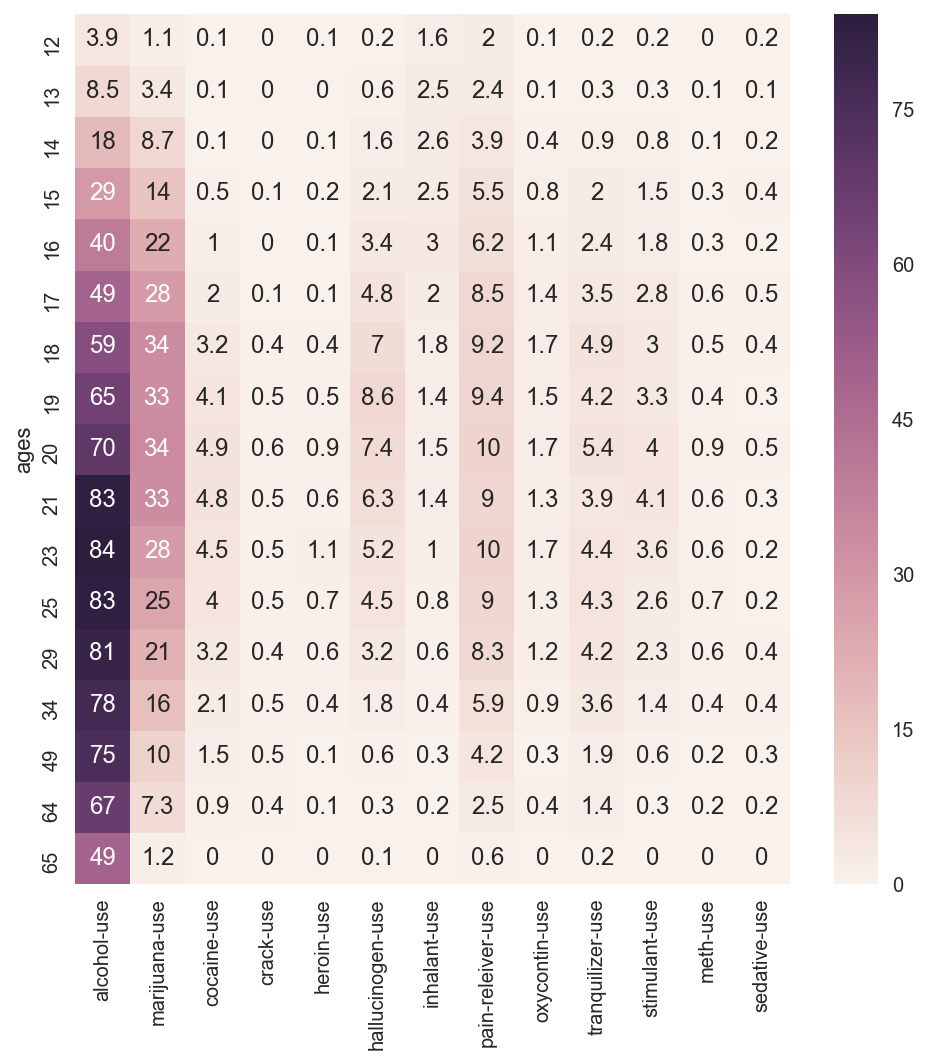

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(drugs_use, annot=True)

Looking at the heatmap, one might be immediately drawn to the high percentage of alcohol use. But is that really the problem though?

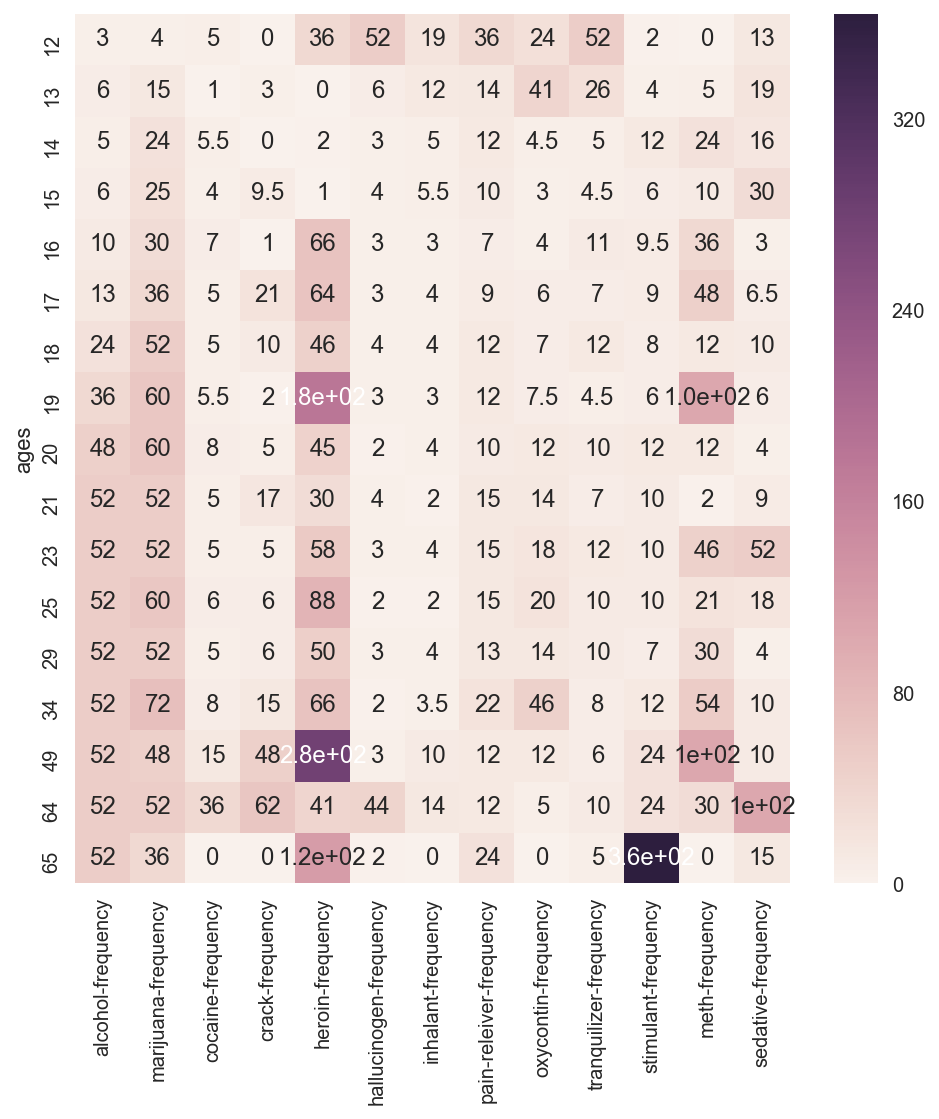

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(drugs_frequency, annot=True)

The plot of frequency of use shows that for adults over the age of 21 where % use of alcohol is high, the median use was at most 52 times over the past 12 months, approximately once a week. That can hardly be considered a problem given the fact that many people do social drinking! The same could be said of marijuana as well, which is often regarded as a 'soft' drug and more socially acceptable than all the other types of drugs in the heatmap. The drugs that need more attention are heroin, stimulants, meth and sedatives, the next most heavily coloured drugs on the heatmap. But leaving that aside


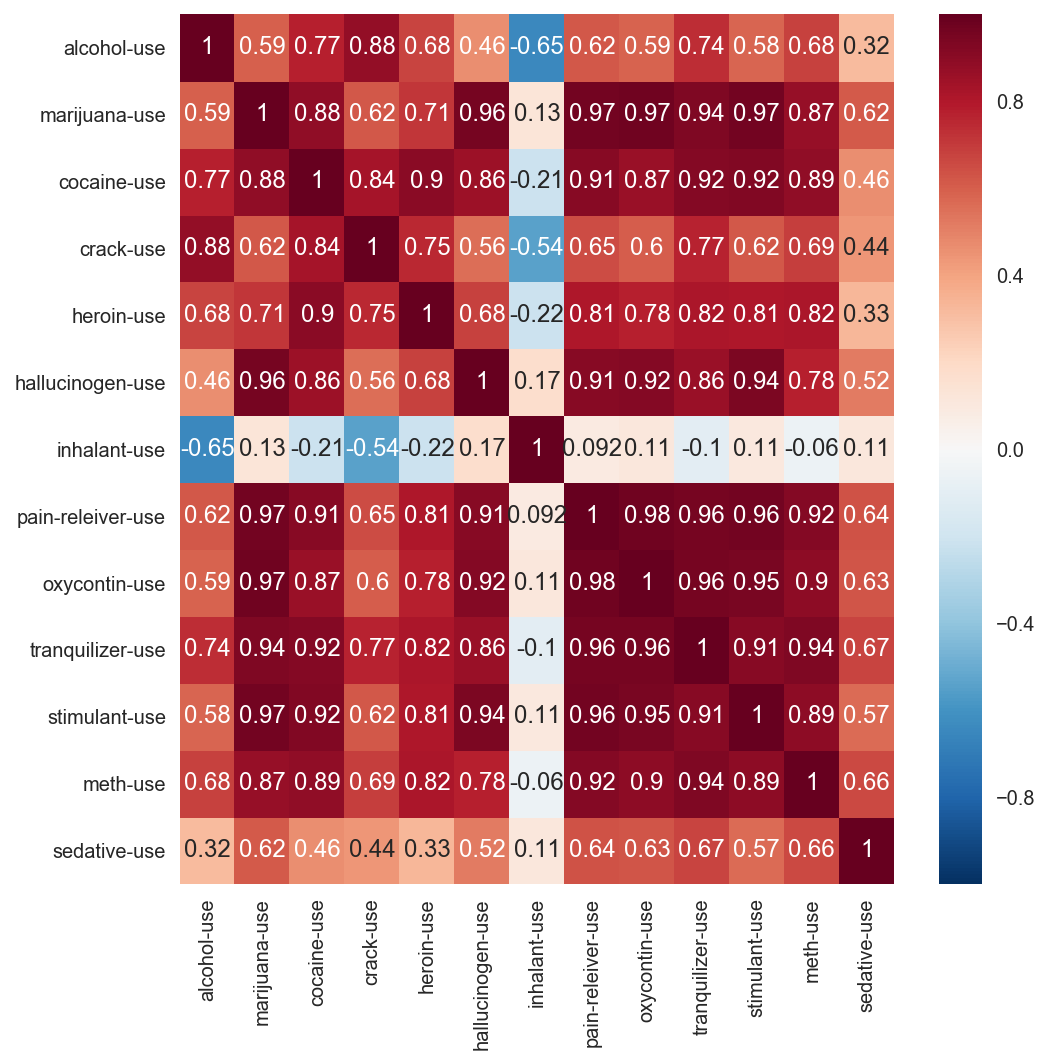

In [29]:
drugs_use_corr = drugs_use.corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(drugs_use_corr, annot=True)

It appears that among all the drugs, only the use of inhalants is not strongly correlated with other drugs. But correlation != causation, so without further information on the sample we are unable to produce any conclusions.



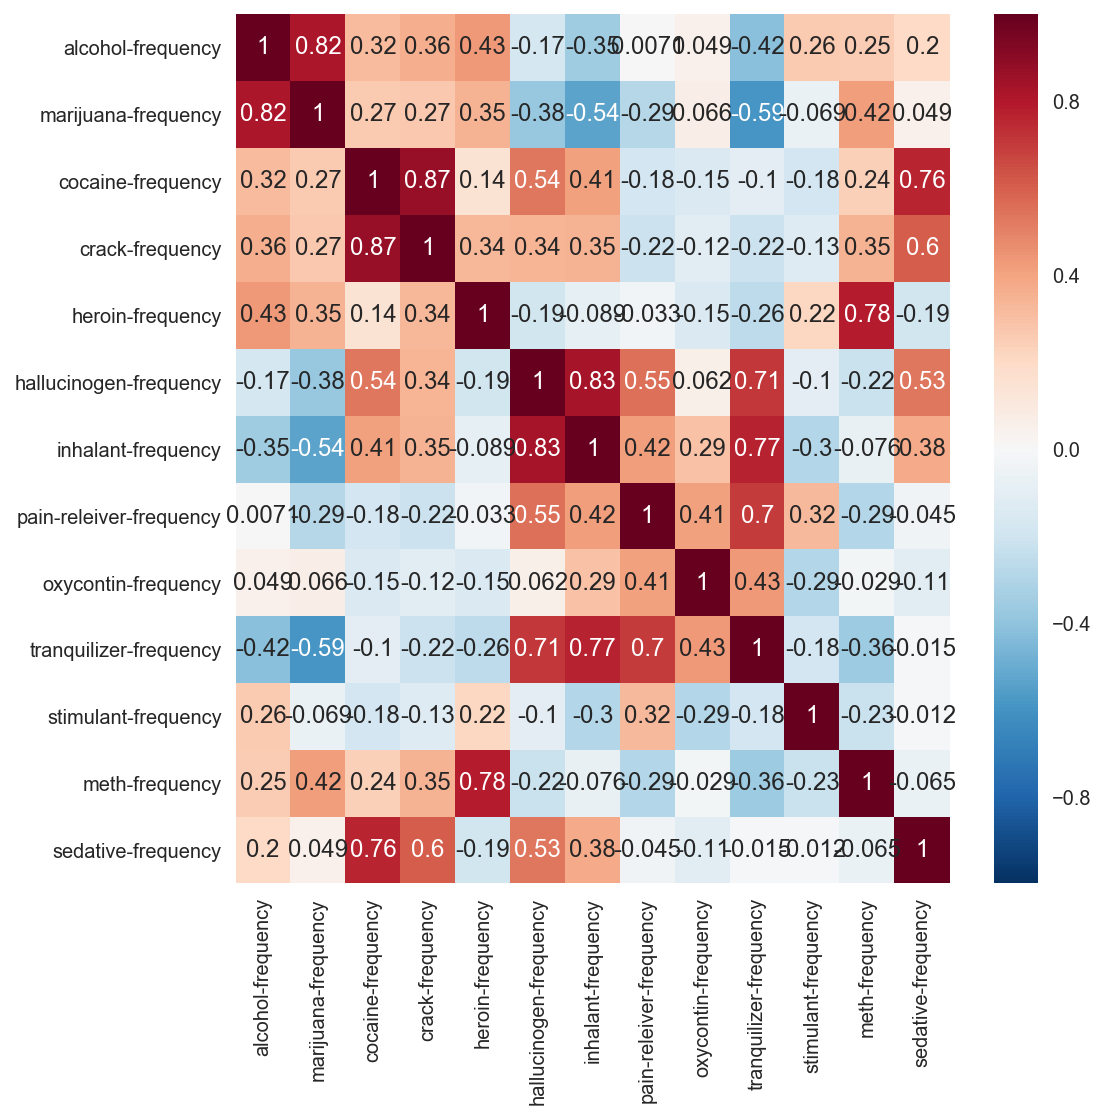

In [30]:
drugs_frequency_corr = drugs_frequency.corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(drugs_frequency_corr, annot=True)

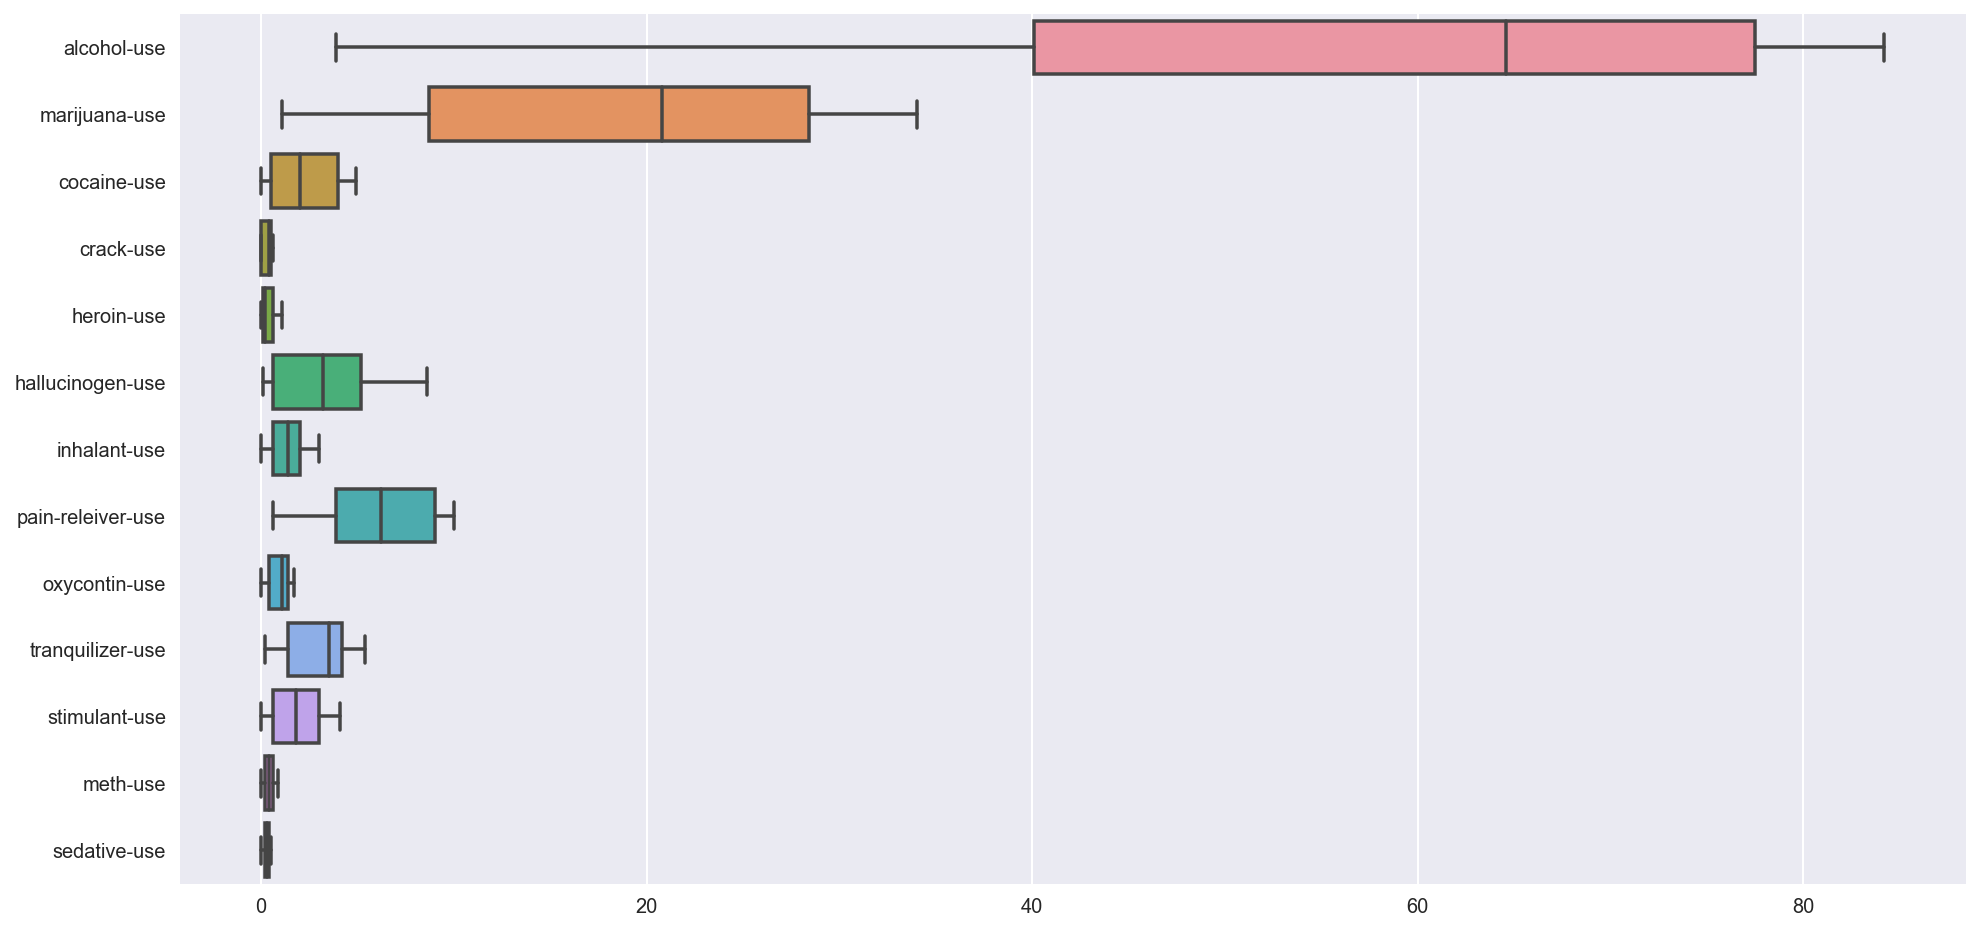

In [44]:
plt.figure(figsize=(16,8))
sns.boxplot(drugs_use, orient='h')

Turning to the distribution of the % of use between age groups, we can see from the boxplot that the % of alcohol use among the different age groups varies the widest. 

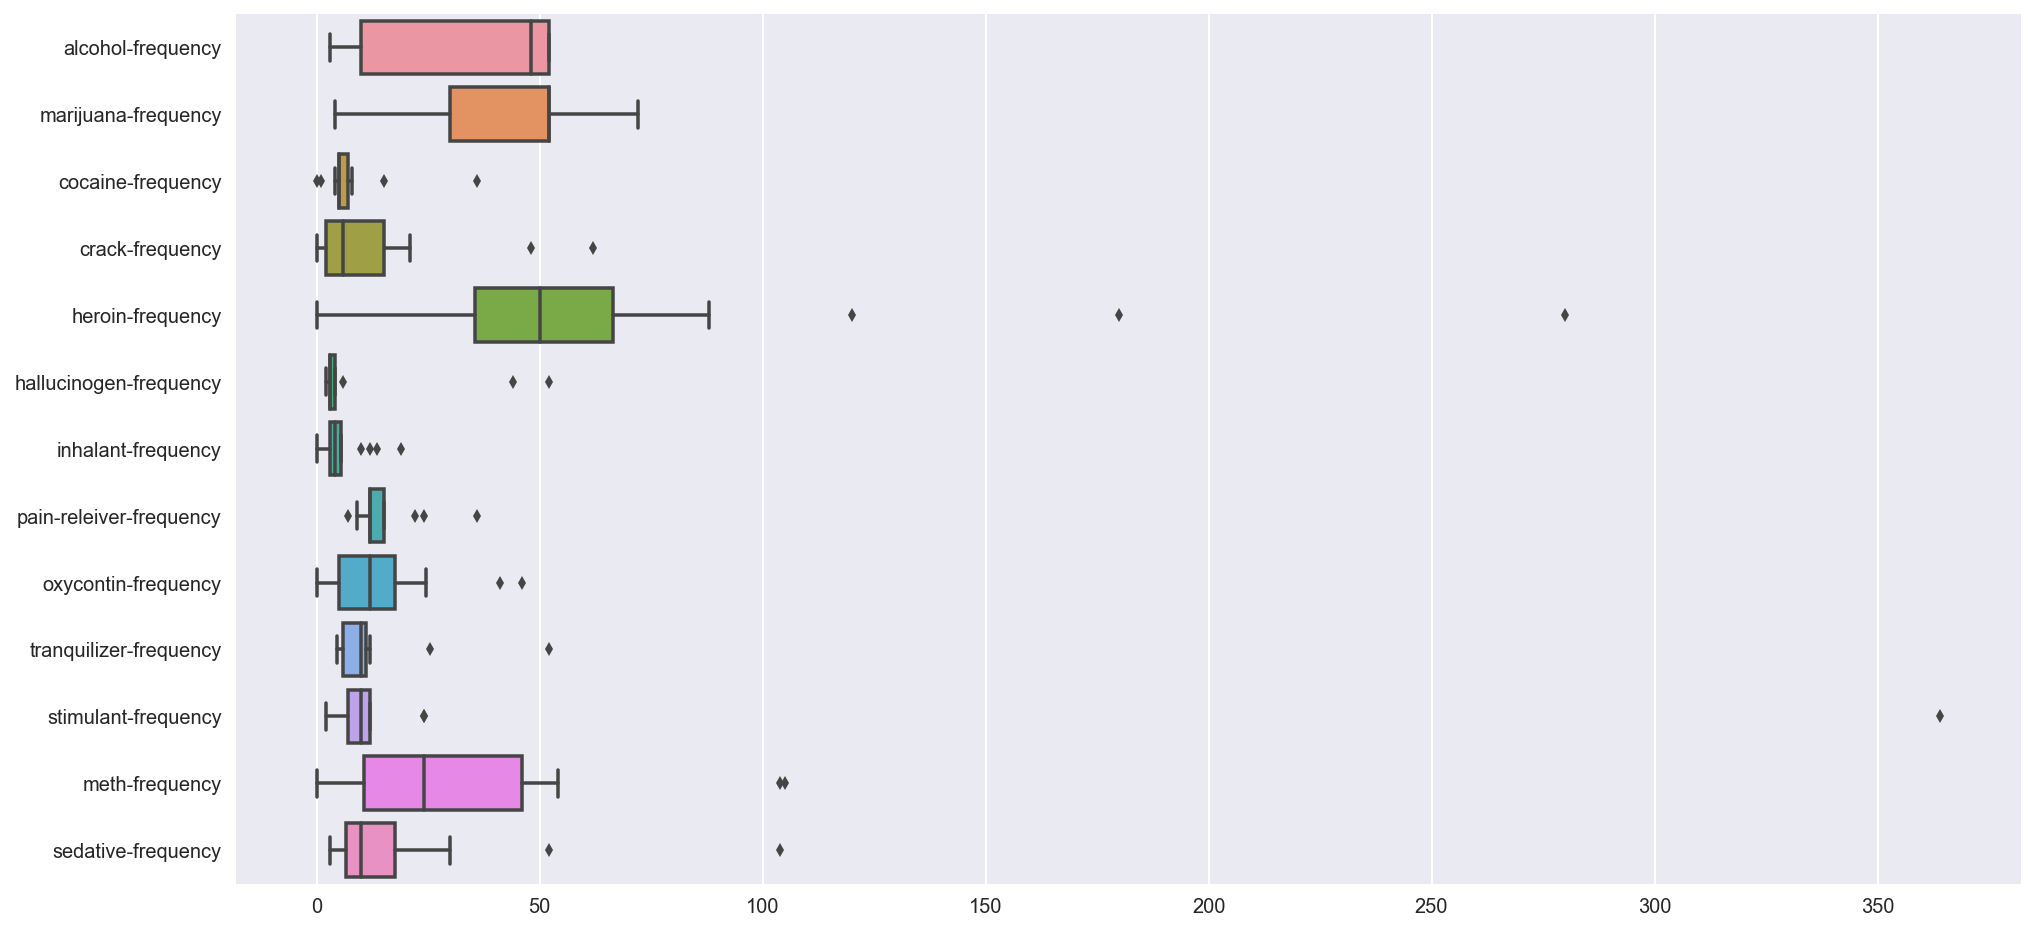

In [32]:
plt.figure(figsize=(16,8))
sns.boxplot(drugs_frequency, orient='h')

The boxplot for frequency of use throws up a few observations:
1. There are no outliers for the distribution of frequency of alcohol and marijuana use. 
2. There are outliers in the frequency of use for crack, heroin, hallucinogens, tranquilizers, stimulants and meth. 
3. Heroin and stimulants have the furthest outliers



### The Dilemma of Numbers vs Heavy Abusers

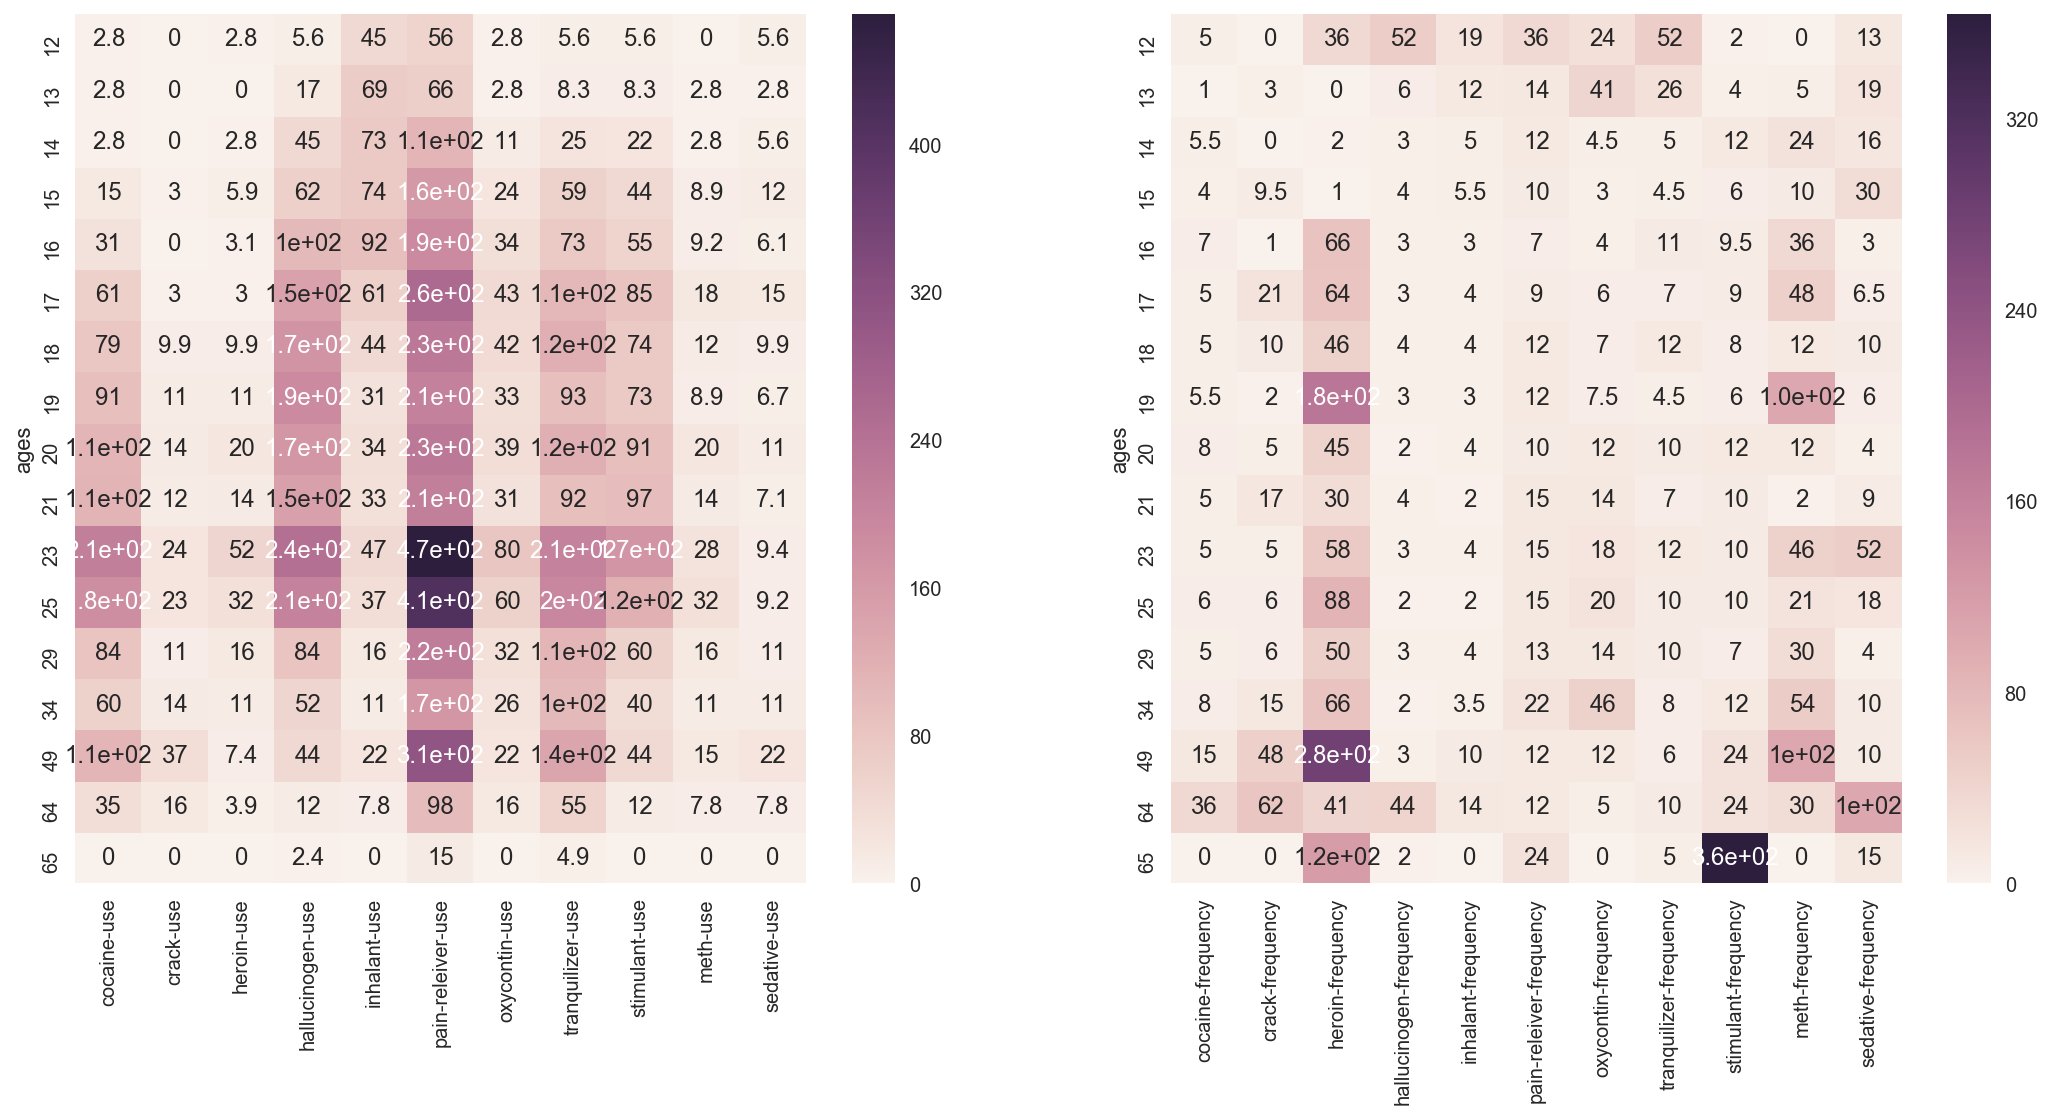

In [33]:
deep = drugs_use.loc[:,'cocaine-use':'sedative-use']
dive = drugs_frequency.loc[:,'cocaine-frequency':'sedative-frequency']

deep2 = deep.multiply(drugs['n']/100, axis=0)  # this will give you a heatmap of number of users

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)   # creates two subplots of 1 row, 2 columns
sns.heatmap(deep2, annot=True)
plt.subplot(1,2,2)
sns.heatmap(dive, annot=True)

Here we see that the absolute number of people who are affected by the use of these drugs on the left, and the frequency of use on the right. While the absolute number of people who use hallucinogens, pain relievers, tranquilizers and stimulants are high, the severity of drug usage is the worst for heroin, meth, stimulants and sedatives, for e.g. adults over the age of 65 have an alarmingly high frequency of stimulant usage. When planning for intervention, do we want to impact the most number of users, or target those users who are the heaviest users of drugs? Without more specific information on the respondents who have indicated drug usage for each of these drugs, it is hard to determine which one is a more pressing concern.

Given the amount of time and resources spent fighting drug usage at the youth level, a useful hypothesis would be to determine if the average rate of use among minors is significantly different from the average rate of use among adults. Using meth as an example, I would posit that the difference in the average rate of use among minors (below the age of 21 in the US) and the average rate of use among adults is zero. 

Therefore null hypothesis, H0: there is no difference in the average rate of use of meth between minors and adults, vs H1: there is a difference in the average rate of use of meth between minors and adults. We will set the level of significance to be 0.05.

In [34]:
minor_use = drugs_use.loc[12:20, 'meth-use']
adult_use = drugs_use.loc[21:, 'meth-use']
stats.ttest_ind(minor_use, adult_use)

Ttest_indResult(statistic=-0.4345421720785988, pvalue=0.67008100646072311)

Since the pvalue is more than 0.05, we cannot reject the null hypothesis that there is no difference in the average use of meth percentage between minors and adults. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

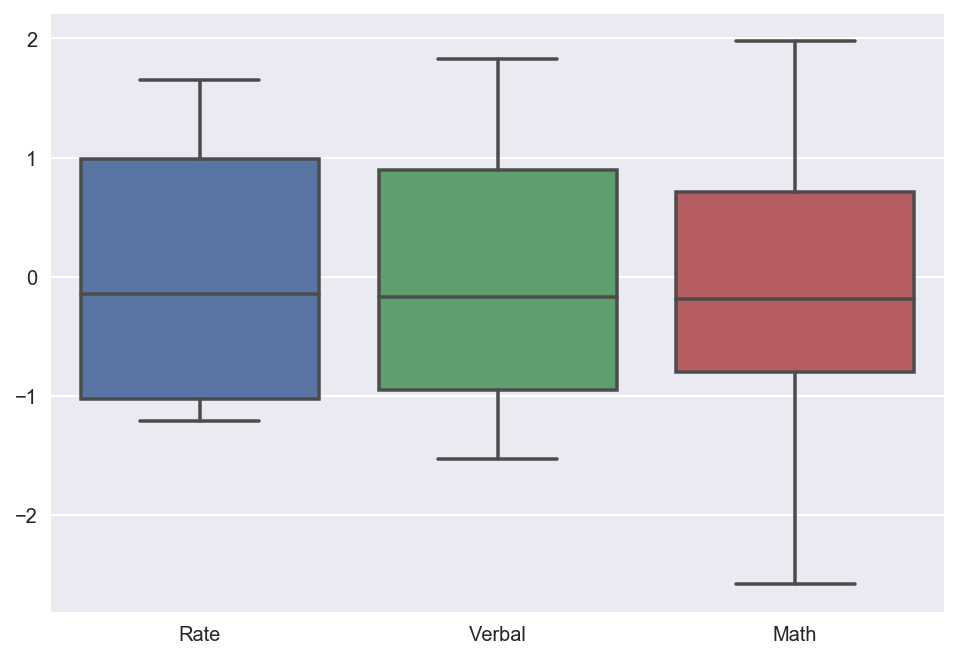

In [35]:
sns.boxplot(data=sat_standard1)

The standardized boxplot shown above already displays the min, max, median, 25th and 75th percentiles and how many standard deviations they are from the mean. Outliers will be plotted as points outside of the boxplot and there does not seem to be any outliers - even OH is not because its value of 439 for Math is still within the Q1-IQR

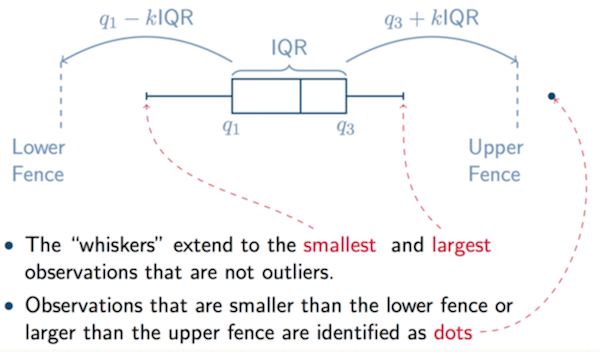

Check that Q1 - IQR is less than OH Math score of 439:

In [36]:
print sat_scores.loc[27,'Math'] - (1.5 * (np.percentile(sat_scores['Math'], 75) - np.percentile(sat_scores['Math'], 25)))

357.25


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [37]:
sat_scores.corr(method='spearman')


,Rate,Verbal,Math,Verbal-Math,Math-Verbal
Rate,1.000000,-0.836058,-0.811662,-0.012267,0.012267
Verbal,-0.836058,1.000000,0.909413,0.042032,-0.042032
Math,-0.811662,0.909413,1.000000,-0.248781,0.248781
Verbal-Math,-0.012267,0.042032,-0.248781,1.000000,-1.000000
Math-Verbal,0.012267,-0.042032,0.248781,-1.000000,1.000000


Spearman's rank correlation measures the degree of association between two variables and is the non-parametric version of the Pearson correlation. Nonparametric means that the data is not required to fit a normal distribution. The calculation is given as below:

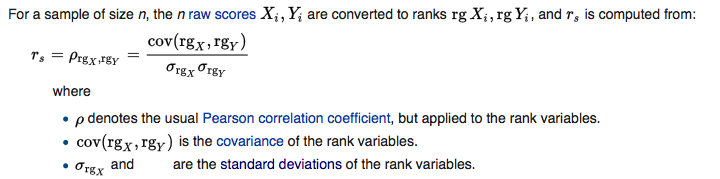

Spearman's rank correlation is more useful than pearson correlation when (i) the conditions of the pearson correlation are violated, and (ii) when comparing variables with ordinal values. Unlike the pearson correlations, Spearman's correlation does not assume that data points are normally distributed around the regression line. 

In the context of SAT scores, since the verbal and math scores are themselves scaled variables, it appears that the quantitative values fall on an ordinal scale, where the maximum value of each is 800 (assuming it follows the new SAT score calculation methodology). More details on how the test's raw scores are standardized can be found here http://blog.prepscholar.com/how-to-calculate-sat-score

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [38]:
rate_percentile = [] 

# appends the percentile ranking of each participation rate into the rate_percentile list
for value in sat_scores['Rate']:
    rate_percentile.append(stats.percentileofscore(sat_scores['Rate'], value))
                           
sat_scores['Percentile'] = rate_percentile

print sat_scores.loc[sat_scores['State'] == 'CA', 'Percentile']

23    55.882353
Name: Percentile, dtype: float64


Both percentile and spearman rank correlation make use of a sorted list of values in their calculations.
The percentile for California (55.88) means that among all the states, 56% of them have participation rates lower than California.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

(array([ 3.,  6.,  4.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([   0.,   28.,   56.,   84.,  112.,  140.,  168.,  196.,  224.,
         252.,  280.]),
 <a list of 10 Patch objects>)

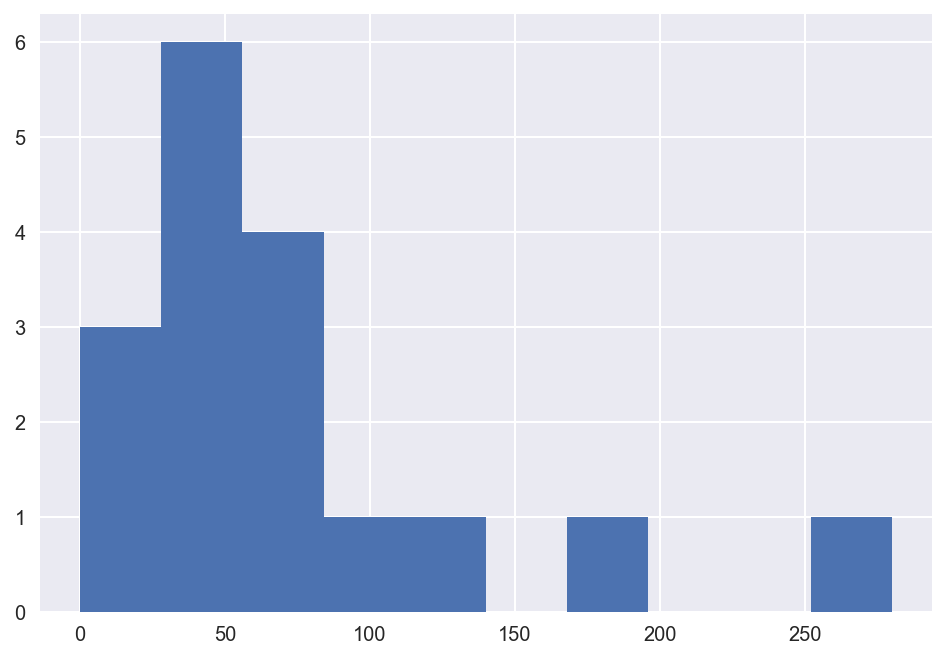

In [39]:
plt.hist(drugs['heroin-frequency'])

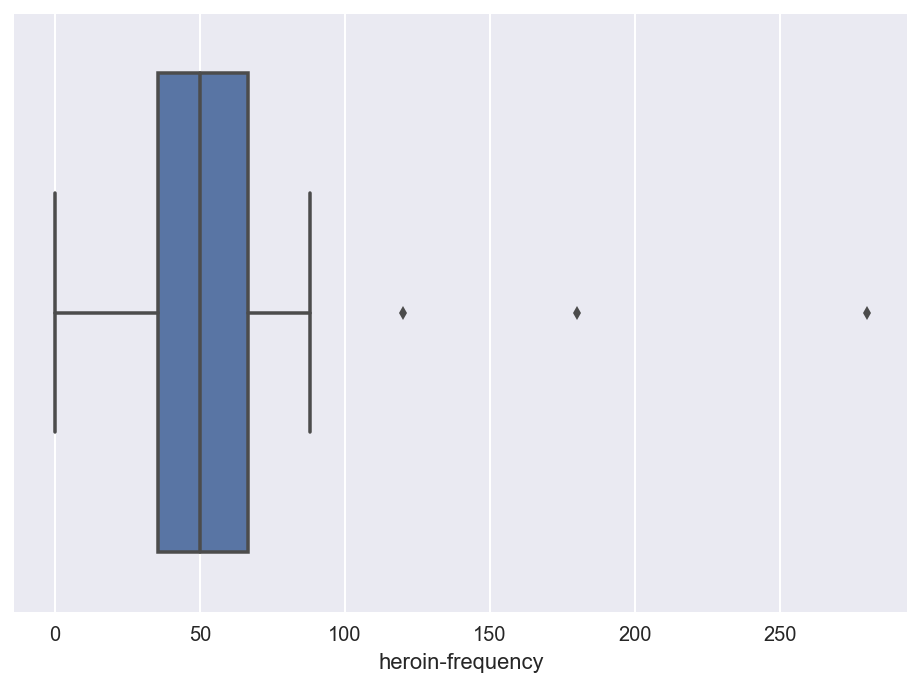

In [40]:
sns.boxplot(drugs['heroin-frequency'])

Comparing between a histogram (no percentiles) and a boxplot diagram (percentiles calculated), the latter graph allows one to instantly check whether there are any outliers in the dataset by plotting it outside of the boxplot.